In [384]:
import numpy as np
import pandas as pd

In [385]:
df = pd.read_csv('fivethirtyeight_ncaa_forecasts.csv') 
df = df.set_index('team_id') #set the numerical team_id to be the index
df.drop(['gender', 'forecast_date', 'playin_flag', 'team_alive', 'team_name', 'team_region'], axis=1, inplace=True)
print(df.head()) #these columns were unnecessary 

         rd1_win  rd2_win  rd3_win  rd4_win  rd5_win  rd6_win  rd7_win  \
team_id                                                                  
222          1.0      1.0      1.0      1.0      1.0      1.0  0.64439   
130          1.0      1.0      1.0      1.0      1.0      1.0  0.35561   
2350         1.0      1.0      1.0      1.0      1.0      0.0  0.00000   
2305         1.0      1.0      1.0      1.0      1.0      0.0  0.00000   
2306         1.0      1.0      1.0      1.0      0.0      0.0  0.00000   

         team_rating team_seed  
team_id                         
222            97.66         1  
130            93.98         3  
2350           87.27        11  
2305           92.37         1  
2306           87.40         9  


*I'm not sure why, but dropping columns only worked when I put the line of code in the cell above and not the one below. I got a "ValueError" message that said the labels of the columns that I wanted to delete were not contained in the axis, but they were. 

In [386]:
#was able to drop all non-numerical values by dropping the columns
df.fillna(0)
print(df)

         rd1_win   rd2_win   rd3_win       rd4_win       rd5_win  \
team_id                                                            
222          1.0  1.000000  1.000000  1.000000e+00  1.000000e+00   
130          1.0  1.000000  1.000000  1.000000e+00  1.000000e+00   
2350         1.0  1.000000  1.000000  1.000000e+00  1.000000e+00   
2305         1.0  1.000000  1.000000  1.000000e+00  1.000000e+00   
2306         1.0  1.000000  1.000000  1.000000e+00  0.000000e+00   
52           1.0  1.000000  1.000000  1.000000e+00  0.000000e+00   
150          1.0  1.000000  1.000000  1.000000e+00  0.000000e+00   
2641         1.0  1.000000  1.000000  1.000000e+00  0.000000e+00   
96           1.0  1.000000  1.000000  0.000000e+00  0.000000e+00   
2440         1.0  1.000000  1.000000  0.000000e+00  0.000000e+00   
2250         1.0  1.000000  1.000000  0.000000e+00  0.000000e+00   
245          1.0  1.000000  1.000000  0.000000e+00  0.000000e+00   
228          1.0  1.000000  1.000000  0.000000e+

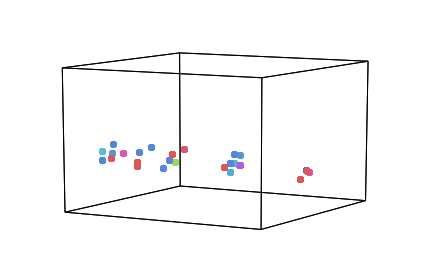

In [387]:
import hypertools as hyp
hyp.plot(df, 'o', hue=np.array(df.index))

In [388]:
a = df.values
print(a)

[[1.0 1.0 1.0 ... 0.6443898733810001 97.66 '1']
 [1.0 1.0 1.0 ... 0.355610126619 93.98 '3']
 [1.0 1.0 1.0 ... 0.0 87.27 '11']
 ...
 [1.0 0.001221192712 0.000101390849 ... 1.0000000000000001e-11 66.59 '16']
 [1.0 0.0007916008139999999 4.4270740999999995e-05 ... 1e-12 62.81 '16']
 [1.0 0.000275298524 1.53374e-05 ... 0.0 60.58 '15']]


In [389]:
df.describe() #summary

,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_rating
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.967033,0.483516,0.241758,0.120879,0.060440,0.030220,0.015110,83.376614
std,0.172966,0.468695,0.386415,0.272505,0.177471,0.111739,0.070889,8.473283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.580000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.690000
50%,1.000000,0.403987,0.000000,0.000000,0.000000,0.000000,0.000000,83.430000
75%,1.000000,1.000000,0.416373,0.037712,0.008234,0.001956,0.000420,88.130000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.764739,115.600000


In [390]:
np.sort(df.team_rating) #another sort

array([ 60.58,  60.58,  60.58, ..., 114.92, 115.6 , 115.6 ])

As shown in the hypertools plot, there's seems to be some correlational relationship between the variables included (whether a team was expected to win in rounds 1-7, teams' ratinings, and teams' seeds) because the 3D plot shows a somewhat cohesive plane of dots. Additionally, the summary table shows that as the percentile rank of a teams' likelihood to win increased so did their team rating. 